In [364]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

sns.set(style="whitegrid", font_scale=1.5, palette="coolwarm", font="arial")

In [365]:
df = pd.read_csv('SuperStoreUS.csv')
codes = pd.read_csv('codes.csv')

In [366]:
df

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,1/7/2015,1/8/2015,4.5600,4,13.01,88522
1,20228,Not Specified,0.02,500.98,26.00,5,Ronnie Proctor,Delivery Truck,Home Office,Furniture,...,West,California,San Gabriel,91776,6/13/2015,6/15/2015,4390.3665,12,6362.85,90193
2,21776,Critical,0.06,9.48,7.29,11,Marcus Dunlap,Regular Air,Home Office,Furniture,...,East,New Jersey,Roselle,7203,2/15/2015,2/17/2015,-53.8096,22,211.15,90192
3,24844,Medium,0.09,78.69,19.99,14,Gwendolyn F Tyson,Regular Air,Small Business,Furniture,...,Central,Minnesota,Prior Lake,55372,5/12/2015,5/14/2015,803.4705,16,1164.45,86838
4,24846,Medium,0.08,3.28,2.31,14,Gwendolyn F Tyson,Regular Air,Small Business,Office Supplies,...,Central,Minnesota,Prior Lake,55372,5/12/2015,5/13/2015,-24.0300,7,22.23,86838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1947,19842,High,0.01,10.90,7.46,3397,Andrea Shaw,Regular Air,Small Business,Office Supplies,...,Central,Illinois,Danville,61832,3/11/2015,3/12/2015,-116.7600,18,207.31,87536
1948,19843,High,0.10,7.99,5.03,3397,Andrea Shaw,Regular Air,Small Business,Technology,...,Central,Illinois,Danville,61832,3/11/2015,3/12/2015,-160.9520,22,143.12,87536
1949,26208,Not Specified,0.08,11.97,5.81,3399,Marvin Reid,Regular Air,Small Business,Office Supplies,...,Central,Illinois,Des Plaines,60016,3/29/2015,3/31/2015,-41.8700,5,59.98,87534
1950,24911,Medium,0.10,9.38,4.93,3400,Florence Gold,Express Air,Small Business,Furniture,...,East,West Virginia,Fairmont,26554,4/4/2015,4/4/2015,-24.7104,15,135.78,87537


In [367]:
# df.drop(['Row ID', 'Customer Name', 'Postal Code', 'Order Date', 'Ship Date'], axis=1)

In [368]:
#shows first 5 rows by default
df.head()

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,1/7/2015,1/8/2015,4.5600,4,13.01,88522
1,20228,Not Specified,0.02,500.98,26.00,5,Ronnie Proctor,Delivery Truck,Home Office,Furniture,...,West,California,San Gabriel,91776,6/13/2015,6/15/2015,4390.3665,12,6362.85,90193
2,21776,Critical,0.06,9.48,7.29,11,Marcus Dunlap,Regular Air,Home Office,Furniture,...,East,New Jersey,Roselle,7203,2/15/2015,2/17/2015,-53.8096,22,211.15,90192
3,24844,Medium,0.09,78.69,19.99,14,Gwendolyn F Tyson,Regular Air,Small Business,Furniture,...,Central,Minnesota,Prior Lake,55372,5/12/2015,5/14/2015,803.4705,16,1164.45,86838
4,24846,Medium,0.08,3.28,2.31,14,Gwendolyn F Tyson,Regular Air,Small Business,Office Supplies,...,Central,Minnesota,Prior Lake,55372,5/12/2015,5/13/2015,-24.0300,7,22.23,86838


In [369]:
#shows last 5 rows by default
df.tail()

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
1947,19842,High,0.01,10.90,7.46,3397,Andrea Shaw,Regular Air,Small Business,Office Supplies,...,Central,Illinois,Danville,61832,3/11/2015,3/12/2015,-116.7600,18,207.31,87536
1948,19843,High,0.10,7.99,5.03,3397,Andrea Shaw,Regular Air,Small Business,Technology,...,Central,Illinois,Danville,61832,3/11/2015,3/12/2015,-160.9520,22,143.12,87536
1949,26208,Not Specified,0.08,11.97,5.81,3399,Marvin Reid,Regular Air,Small Business,Office Supplies,...,Central,Illinois,Des Plaines,60016,3/29/2015,3/31/2015,-41.8700,5,59.98,87534
1950,24911,Medium,0.10,9.38,4.93,3400,Florence Gold,Express Air,Small Business,Furniture,...,East,West Virginia,Fairmont,26554,4/4/2015,4/4/2015,-24.7104,15,135.78,87537
1951,25914,High,0.10,105.98,13.99,3403,Tammy Buckley,Express Air,Consumer,Furniture,...,West,Wyoming,Cheyenne,82001,2/8/2015,2/11/2015,349.4850,5,506.50,87530


In [370]:
#Shows the num of rows, and the num of columns
df.shape

(1952, 25)

In [371]:
#Shows the number of elements in the DataFrame
df.size

48800

In [372]:
#Returns a summary or an information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1952 entries, 0 to 1951
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Row ID                1952 non-null   int64  
 1   Order Priority        1952 non-null   object 
 2   Discount              1952 non-null   float64
 3   Unit Price            1952 non-null   float64
 4   Shipping Cost         1952 non-null   float64
 5   Customer ID           1952 non-null   int64  
 6   Customer Name         1952 non-null   object 
 7   Ship Mode             1952 non-null   object 
 8   Customer Segment      1952 non-null   object 
 9   Product Category      1952 non-null   object 
 10  Product Sub-Category  1952 non-null   object 
 11  Product Container     1952 non-null   object 
 12  Product Name          1952 non-null   object 
 13  Product Base Margin   1936 non-null   float64
 14  Country               1952 non-null   object 
 15  Region               

In [373]:
#Returns a description of the data in the DataFrame
df.describe()

,Row ID,Discount,Unit Price,Shipping Cost,Customer ID,Product Base Margin,Postal Code,Profit,Quantity ordered new,Sales,Order ID
count,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1936.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000
mean,19916.479508,0.048975,109.079221,12.968151,1735.376537,0.515186,51534.769467,114.793859,12.944672,985.828832,82365.924180
std,5957.595627,0.031378,393.481301,17.414631,991.078006,0.137055,29362.828420,1141.112387,13.871565,2559.900167,19042.295798
min,64.000000,0.000000,1.140000,0.490000,3.000000,0.350000,1001.000000,-16476.838000,1.000000,2.250000,359.000000
25%,19121.000000,0.020000,6.480000,3.230000,875.000000,0.380000,28560.000000,-84.485400,5.000000,58.807500,86767.750000
50%,21164.500000,0.050000,20.990000,6.150000,1738.000000,0.525000,48765.500000,1.476450,10.000000,202.395000,88376.000000
75%,23483.250000,0.080000,100.972500,14.362500,2578.250000,0.590000,78550.000000,116.201575,16.000000,802.945000,89957.000000
max,26389.000000,0.210000,6783.020000,164.730000,3403.000000,0.850000,99362.000000,9228.225600,167.000000,45737.330000,91586.000000


In [374]:
df.isnull().sum()

Row ID                   0
Order Priority           0
Discount                 0
Unit Price               0
Shipping Cost            0
Customer ID              0
Customer Name            0
Ship Mode                0
Customer Segment         0
Product Category         0
Product Sub-Category     0
Product Container        0
Product Name             0
Product Base Margin     16
Country                  0
Region                   0
State or Province        0
City                     0
Postal Code              0
Order Date               0
Ship Date                0
Profit                   0
Quantity ordered new     0
Sales                    0
Order ID                 0
dtype: int64

In [375]:
df["Profit"].describe()

count     1952.000000
mean       114.793859
std       1141.112387
min     -16476.838000
25%        -84.485400
50%          1.476450
75%        116.201575
max       9228.225600
Name: Profit, dtype: float64

In [376]:
df["Sales"].describe()

count     1952.000000
mean       985.828832
std       2559.900167
min          2.250000
25%         58.807500
50%        202.395000
75%        802.945000
max      45737.330000
Name: Sales, dtype: float64

In [377]:
df.describe(include='all')

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
count,1952.000000,1952,1952.000000,1952.000000,1952.000000,1952.000000,1952,1952,1952,1952,...,1952,1952,1952,1952.000000,1952,1952,1952.000000,1952.000000,1952.000000,1952.000000
unique,NaN,6,NaN,NaN,NaN,NaN,1130,3,4,3,...,4,49,869,NaN,179,187,NaN,NaN,NaN,NaN
top,NaN,Low,NaN,NaN,NaN,NaN,Jenny Gold,Regular Air,Corporate,Office Supplies,...,Central,California,New York City,NaN,4/9/2015,1/8/2015,NaN,NaN,NaN,NaN
freq,NaN,398,NaN,NaN,NaN,NaN,9,1437,684,1071,...,566,214,47,NaN,28,23,NaN,NaN,NaN,NaN
mean,19916.479508,NaN,0.048975,109.079221,12.968151,1735.376537,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,51534.769467,NaN,NaN,114.793859,12.944672,985.828832,82365.924180
std,5957.595627,NaN,0.031378,393.481301,17.414631,991.078006,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,29362.828420,NaN,NaN,1141.112387,13.871565,2559.900167,19042.295798
min,64.000000,NaN,0.000000,1.140000,0.490000,3.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1001.000000,NaN,NaN,-16476.838000,1.000000,2.250000,359.000000
25%,19121.000000,NaN,0.020000,6.480000,3.230000,875.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,28560.000000,NaN,NaN,-84.485400,5.000000,58.807500,86767.750000
50%,21164.500000,NaN,0.050000,20.990000,6.150000,1738.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,48765.500000,NaN,NaN,1.476450,10.000000,202.395000,88376.000000
75%,23483.250000,NaN,0.080000,100.972500,14.362500,2578.250000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,78550.000000,NaN,NaN,116.201575,16.000000,802.945000,89957.000000


In [378]:

#plt.figure(figsize=(58,20))
#sns.histplot(df["Product Sub-Category"]) 
#plt.title("Example Histogram");

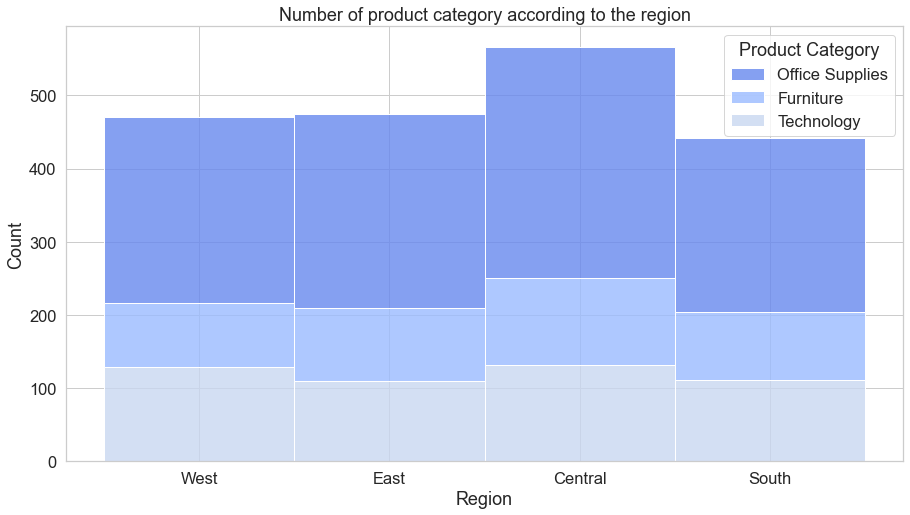

In [379]:
# Stacked Histogram separated by origin
plt.figure(figsize=(15,8))
sns.histplot(
    df,
    x="Region",
    hue="Product Category"
    , 
    multiple="stack", # also can be layer or dodge or fill
    alpha=0.8)
plt.title("Number of product category according to the region");


/var/folders/ch/0t60x38j3v772kvwf23tgd5c0000gn/T/ipykernel_71519/3182881129.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



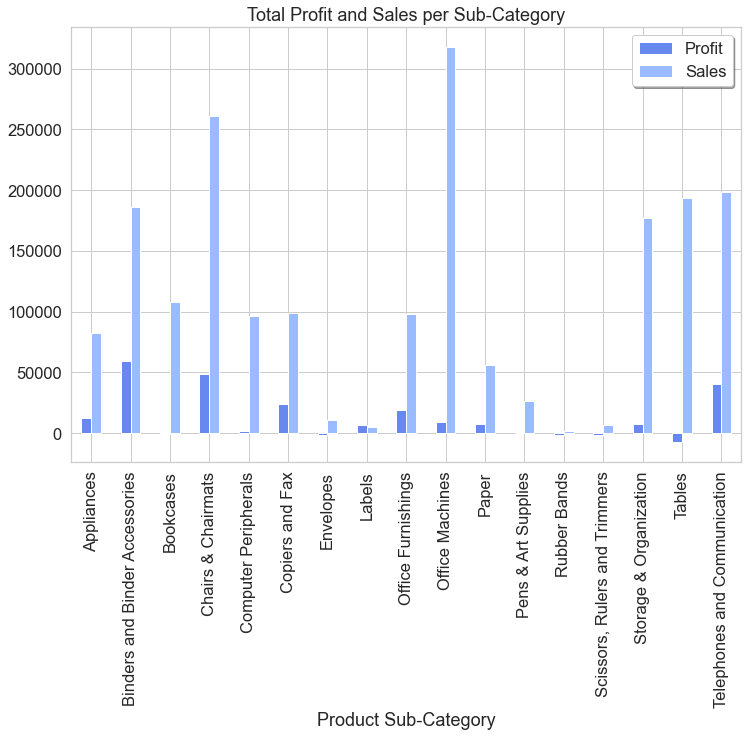

In [380]:
# Shows Total Profit and Sales per Sub-Category
df.groupby('Product Sub-Category')['Profit','Sales'].agg(['sum']).plot.bar(figsize=[12,8]);
plt.title('Total Profit and Sales per Sub-Category')
plt.legend(['Profit','Sales'], shadow = True, loc = 0)
plt.show()

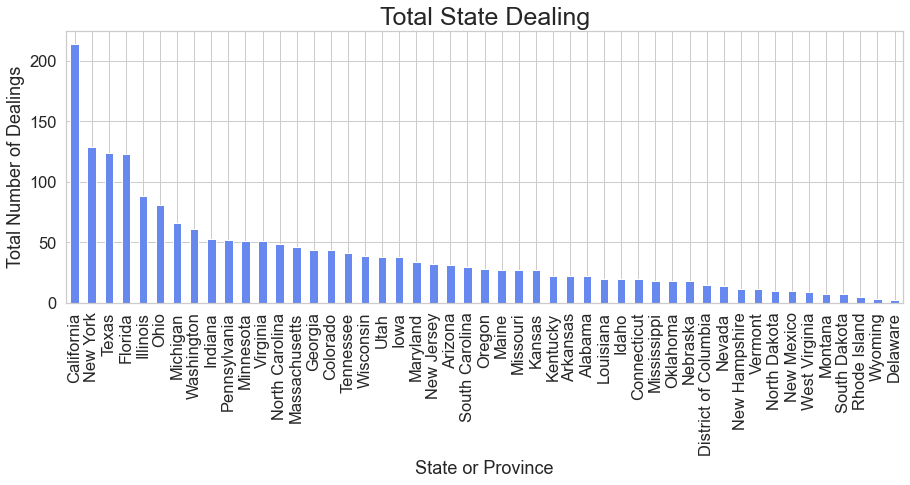

In [381]:
# Shows the total number of (Quantity ordered new) for each State or province
df_state_dealings = df.groupby('State or Province')['Quantity ordered new'].count().sort_values(ascending = False).plot.bar(figsize = (15, 5))
plt.ylabel('Total Number of Dealings')
plt.xlabel('State or Province')
plt.title('Total State Dealing', fontsize = 25)
plt.show()

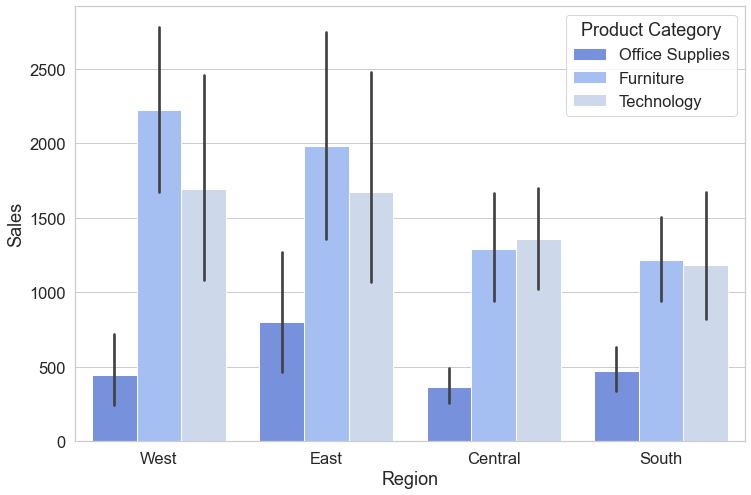

In [382]:
# shows the total number of sales  in the regions 
plt.figure(figsize=[12,8])
ax = sns.barplot(x="Region", y="Sales", hue="Product Category", data=df)

In [383]:
#sns.jointplot(x='Quantity ordered new', 
         #     y='Sales',data=df,
         #     kind='scatter',
          #    palette='coolwarm'); # kind can be'hex', 'kde' or 'reg'

/Users/user/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



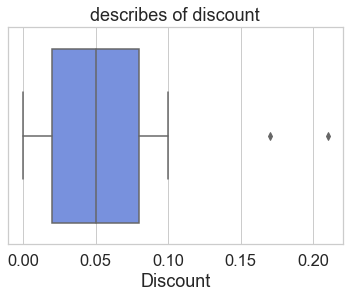

In [384]:
sns.boxplot(df["Discount"]);

plt.title("describes of discount");

In [385]:
df["Discount"].describe()

count    1952.000000
mean        0.048975
std         0.031378
min         0.000000
25%         0.020000
50%         0.050000
75%         0.080000
max         0.210000
Name: Discount, dtype: float64

In [386]:
#sns.boxplot(x="Region", y="Product Base Margin", data=df);

#plt.title("Example Histogram");

In [387]:
#df["Product Base Margin"].describe()

In [388]:
#virtualization

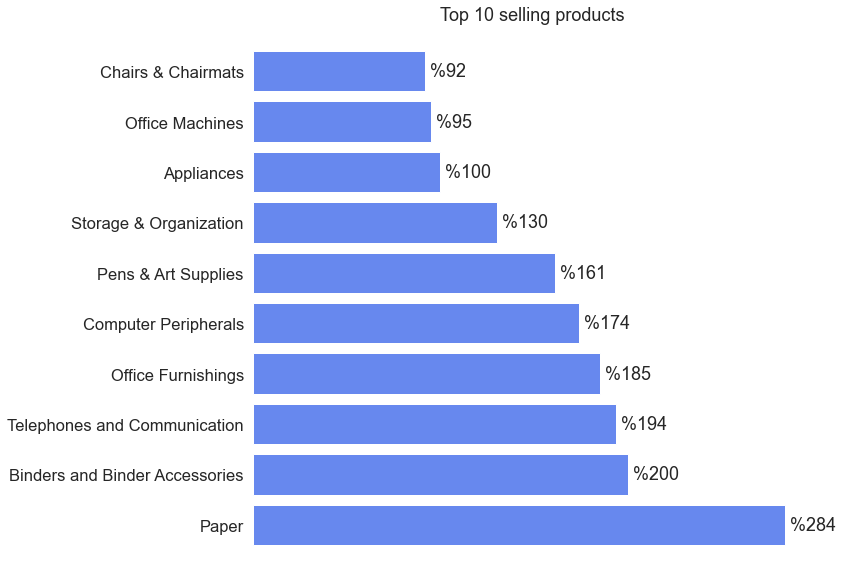

In [389]:
#Top 10 selling products

products = df['Product Sub-Category'].value_counts()

#take top 10 
bars = products.index[0:10]
height = products.values[0:10]

plt.figure(figsize=(10,10))
plt.title("Top 10 selling products")

#draw
plt.barh(bars, height);

#add annotation
for i in range(len(bars)):
    plt.annotate(" %"+str(height[i]), xy=(height[i],bars[i]), ha='left', va='center')
    
#hide x axis
plt.xticks([], [])

#remove border and grid
plt.box(False)
plt.grid(False)

In [390]:
#The most cities demand 
import plotly.express as px #importing plotly library-- if you don't have it please don't run this chart ^^

df_add_codes = df.merge(codes, how='inner', left_on='State or Province', right_on='State').drop(columns=['State', 'Abbrev'])

fig = px.choropleth(df_add_codes, locations='Code', 
                    title = "The most cities demand",
                    locationmode="USA-states", 
                    color='Order ID', 
                    scope="usa")

fig.update_coloraxes(showscale=False)
fig.show()

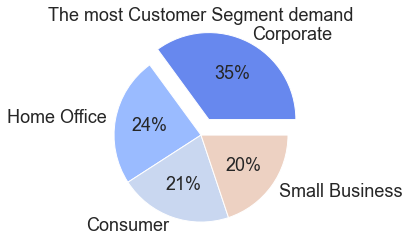

In [391]:
#The most Customer Segment demand
segment = df['Customer Segment'].value_counts()
plt.pie(segment.values, 
        labels=segment.index, 
        autopct='%.0f%%', 
        explode = [0.2, 0, 0, 0],
       textprops={'fontsize': 18});
plt.title('The most Customer Segment demand');

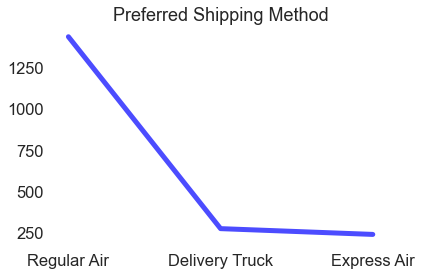

In [392]:
#Preferred Ship Mode
fav_ship = df['Ship Mode'].value_counts()

plt.plot(fav_ship.index,fav_ship.values, 'b', linewidth=5, alpha=0.7 )
plt.title('Preferred Shipping Method')

#remove border and grid
plt.box(False)
plt.grid(False)

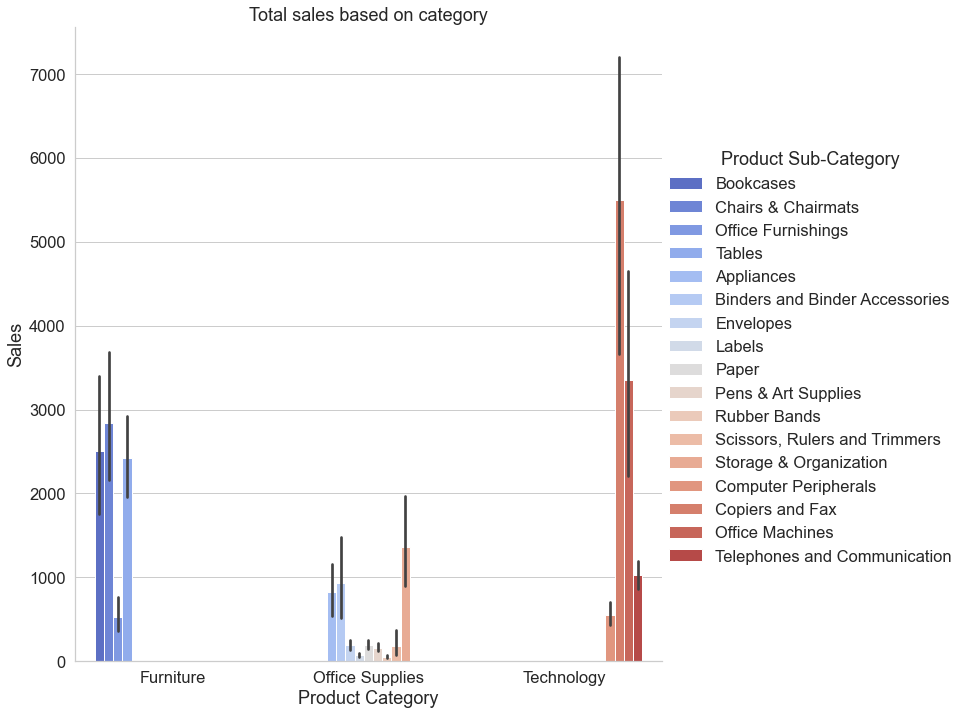

In [393]:
#Total sales based on category - Product Category - Product Sub-Category - Sales
category = df.groupby(["Product Category", 
                             "Product Sub-Category", 
                             'Sales'], as_index=True, observed=True).sum()
category = category.reset_index()
# labels = ["{}K".format(i//1000) for i in category['Sales']]

sns.catplot(data=category, 
            x="Product Category", 
            y="Sales", 
            hue="Product Sub-Category", 
            kind="bar", 
            palette='coolwarm',
            height=10).set(title='Total sales based on category');


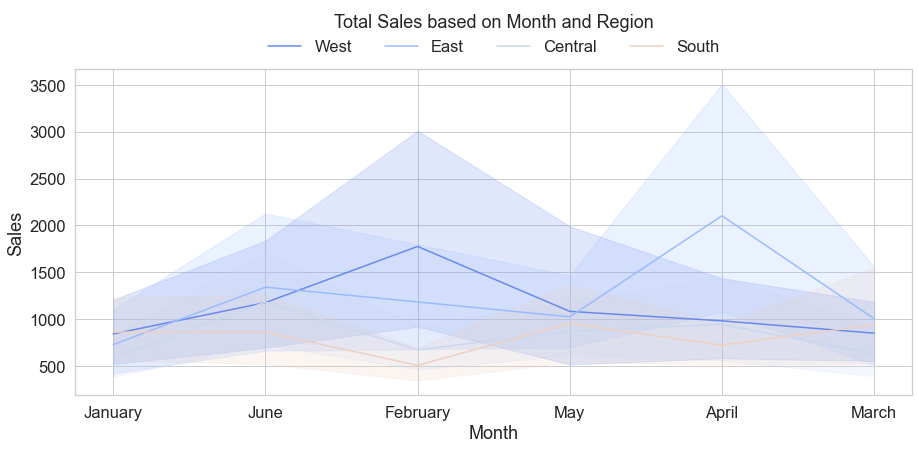

In [394]:
#Total sales based on month and Region 
df['Month'] = pd.to_datetime(df['Order Date']).dt.month_name()

# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(15, 6))

sns.lineplot(data=df, 
             x= df['Month'], 
             y=df['Sales'], 
             hue='Region',
             ax=ax);

#set legends
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(.5, 1),
    ncol=4,
    title='Total Sales based on Month and Region',
    frameon=False,
)

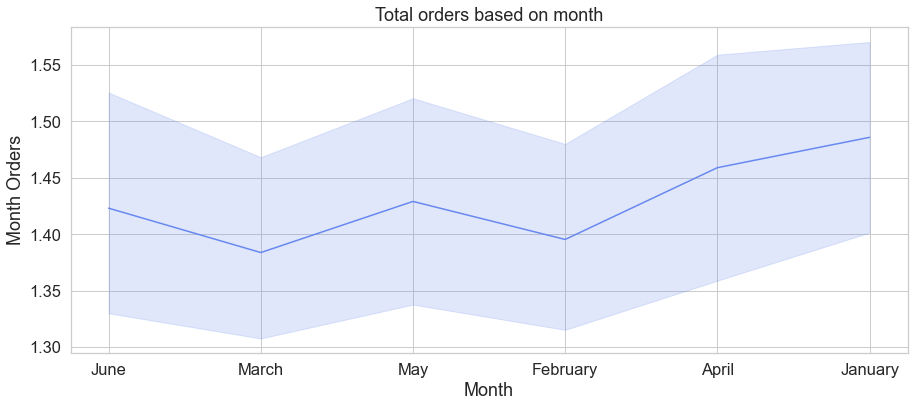

In [395]:
#Total orders based on month
orders = df.groupby(["Order ID", 'Month'])['Month'].count().reset_index(name='Month Orders')
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(15, 6))

sns.lineplot(
    data=orders,
    x="Month", y='Month Orders',
    markers=True,
    ax=ax,
).set(title='Total orders based on month');  

plt.savefig('img/orders.png')

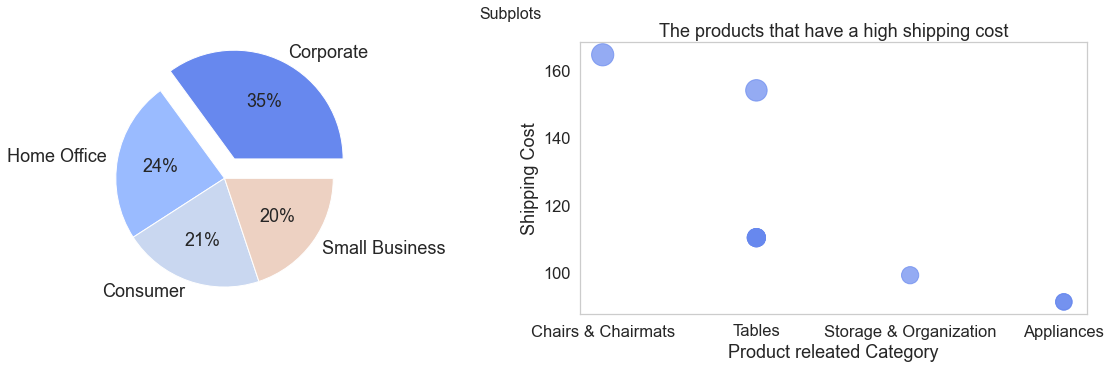

In [400]:
plt.figure(figsize=[20,5])
plt.suptitle('Subplots',fontsize = 16)

#first
plt.subplot(1,2,1) #(number of rows, number of columns, number of plot)
plt.pie(segment.values, 
        labels=segment.index, 
        autopct='%.0f%%', 
        explode = [0.2, 0, 0, 0],
       textprops={'fontsize': 18});

#second
plt.subplot(1,2,2)
plt.scatter(largest_cost['Product Sub-Category'], 
            largest_cost['Shipping Cost'], 
            alpha=0.7, 
            s=largest_cost['Shipping Cost']*3,
           );

plt.xlabel('Product releated Category')
plt.ylabel('Shipping Cost')
plt.title('The products that have a high shipping cost');

#remove grid
plt.grid(False)

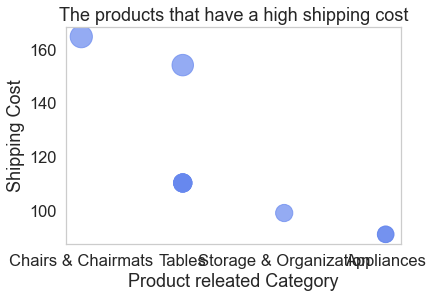

In [397]:
#The products that have a high shipping cost -- Shipping Cost -- Product Name
largest_cost = df.nlargest(n=10, columns=['Shipping Cost'])

plt.scatter(largest_cost['Product Sub-Category'], 
            largest_cost['Shipping Cost'], 
            alpha=0.7, 
            s=largest_cost['Shipping Cost']*3,
           );

plt.xlabel('Product releated Category')
plt.ylabel('Shipping Cost')
plt.title('The products that have a high shipping cost');

#remove grid
plt.grid(False)

In [398]:

from pandas_profiling import ProfileReport

df = pd.DataFrame( np.random.rand(100 , 3),
                  columns = ['a','b','c'])

Profile = ProfileReport (df , title = "SuperStore" , html = {"style":{"full_width":True}})

In [399]:
Profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]